# <center> **Image Types** </center>
## <font size=4> **Visión por Computadora 2025** </font> <font color=gray size=4> -- Alan Reyes-Figueroa </font>

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import skimage as ski
from PIL import Image

from sklearn.cluster import k_means

# Read binary image

In [2]:
I = plt.imread('plane_mask.png')

In [3]:
I.shape

(160, 240, 4)

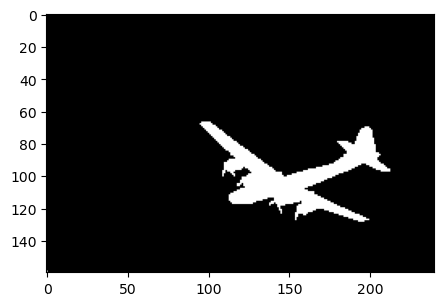

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(I[:,:,1], cmap='gray')
plt.show()

In [5]:
# primera capa
I = I[:,:,0]

In [6]:
I.shape

(160, 240)

In [7]:
I[90:100, 100:110]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [8]:
I.shape

(160, 240)

In [9]:
print(type(I))
print(type(I[0,0]))

<class 'numpy.ndarray'>
<class 'numpy.float32'>


In [10]:
I = I.astype(np.uint8)

In [11]:
print(type(I))
print(type(I[0,0]))

<class 'numpy.ndarray'>
<class 'numpy.uint8'>


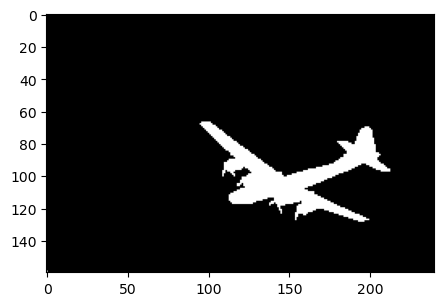

In [12]:
plt.figure(figsize=(5,5))
plt.imshow(I, cmap='gray')
plt.show()

In [13]:
Icrop = I[90:100, 100:120]

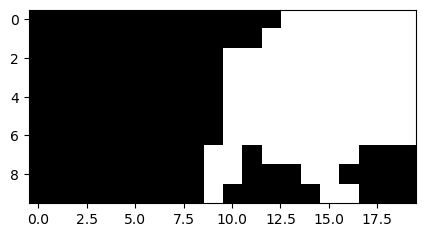

In [14]:
plt.figure(figsize=(5,5))
plt.imshow(Icrop, cmap='gray')
plt.show()

In [15]:
Icrop

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]],
      dtype=uint8)

In [16]:
# Convert to float

J = I.astype(np.float32)
Jcrop = J[90:100, 100:120]

In [17]:
Jcrop

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 0.]], dtype=float32)

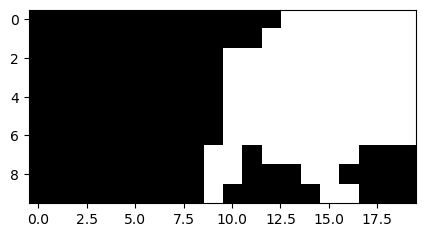

In [18]:
plt.figure(figsize=(5,5))
plt.imshow(Jcrop, cmap='gray')
plt.show()

In [19]:
Kcrop = (Jcrop * 255).astype(np.uint8)

In [20]:
Kcrop

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0, 255,
        255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,  

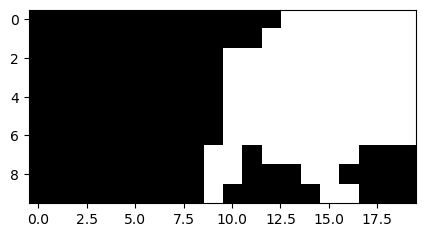

In [21]:
plt.figure(figsize=(5,5))
plt.imshow(Kcrop, cmap='gray')
plt.show()

In [22]:
h = np.histogram(I, bins=2)

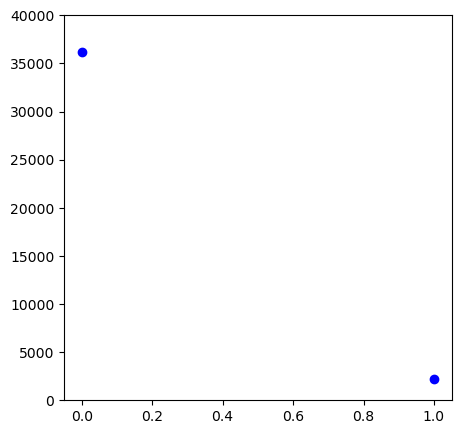

In [23]:
plt.figure(figsize=(5,5))
plt.plot(h[1][[0,-1]], h[0], 'bo')
plt.ylim([0, 40000])
plt.show()

In [24]:
(I == 0).sum()

36158

In [25]:
(I == 1).sum()

2242

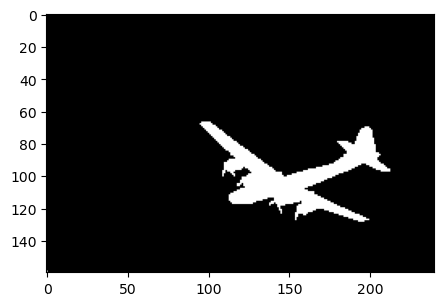

In [26]:
plt.figure(figsize=(5,5))
plt.imshow((I == 1), cmap='gray')
plt.show()

# Read grayscale image

In [27]:
I = plt.imread('plane.png')

In [28]:
I.shape

(160, 240, 4)

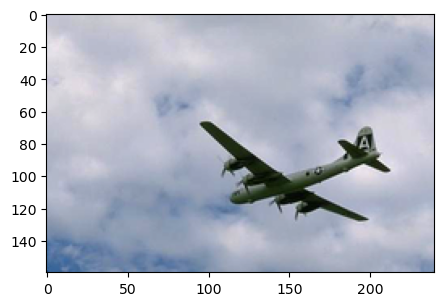

In [29]:
plt.figure(figsize=(5,5))
plt.imshow(I)
plt.show()

In [30]:
I = I[:,:,:3]
I = ski.color.rgb2gray(I)

In [31]:
I.shape

(160, 240)

In [32]:
print(type(I))
print(type(I[0,0]))

<class 'numpy.ndarray'>
<class 'numpy.float32'>


In [33]:
print(I.min(), I.max())

0.0 0.9907353


In [34]:
# Convert to 8 bits format [0-255]
I = (255*I).astype(np.uint8)

In [35]:
print(type(I))
print(type(I[0,0]))

<class 'numpy.ndarray'>
<class 'numpy.uint8'>


In [36]:
print(I.min(), I.max())

0 252


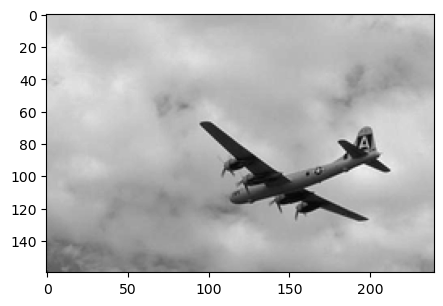

In [37]:
plt.figure(figsize=(5,5))
plt.imshow(I, cmap='gray')
plt.show()

In [38]:
Icrop = I[90:100, 105:115]

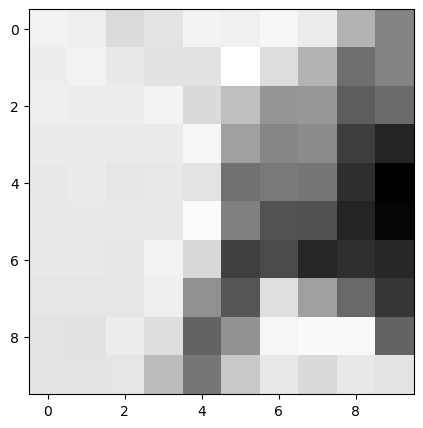

In [39]:
plt.figure(figsize=(5,5))
plt.imshow(Icrop, cmap='gray')
plt.show()

In [40]:
Icrop

array([[178, 176, 162, 168, 180, 177, 182, 174, 133,  99],
       [175, 178, 172, 167, 167, 188, 163, 133,  84,  99],
       [176, 175, 175, 179, 161, 142, 112, 113,  72,  82],
       [173, 173, 173, 173, 181, 120, 101, 105,  50,  32],
       [172, 173, 170, 171, 168,  87,  92,  90,  38,   5],
       [172, 172, 171, 172, 185,  97,  65,  64,  32,   9],
       [171, 171, 170, 178, 160,  51,  59,  33,  39,  33],
       [169, 169, 169, 176, 108,  66, 165, 119,  80,  44],
       [168, 167, 174, 164,  76, 110, 181, 184, 183,  76],
       [168, 168, 169, 140,  90, 148, 171, 161, 171, 168]], dtype=uint8)

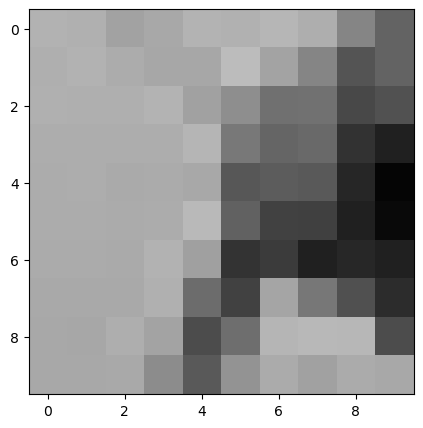

In [41]:
plt.figure(figsize=(5,5))
plt.imshow(Icrop, cmap='gray', vmin=0, vmax=255)
plt.show()

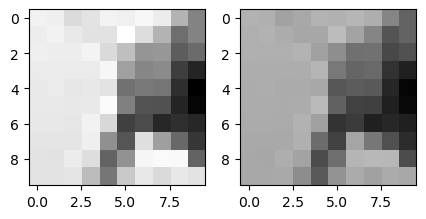

In [42]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(Icrop, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(Icrop, cmap='gray', vmin=0, vmax=255)
plt.show()

In [43]:
Kcrop = Jcrop * 255

In [44]:
# Operaciones con imágenes en gris

Imas   = I + 50
Imenos = I - 50

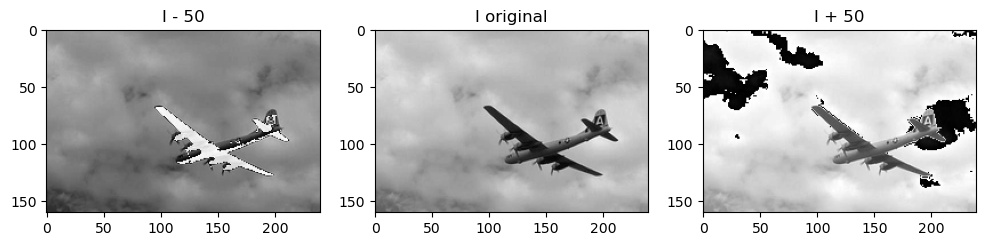

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(Imenos, cmap='gray', vmin=0, vmax=255)
plt.title('I - 50')
plt.subplot(1,3,2)
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title('I original')
plt.subplot(1,3,3)
plt.imshow(Imas, cmap='gray', vmin=0, vmax=255)
plt.title('I + 50')
plt.show()

In [46]:
A = np.clip((I.astype(np.float32) - 50), 0, 255).astype(np.uint8)
B = np.clip((I.astype(np.float32) + 50), 0, 255).astype(np.uint8)

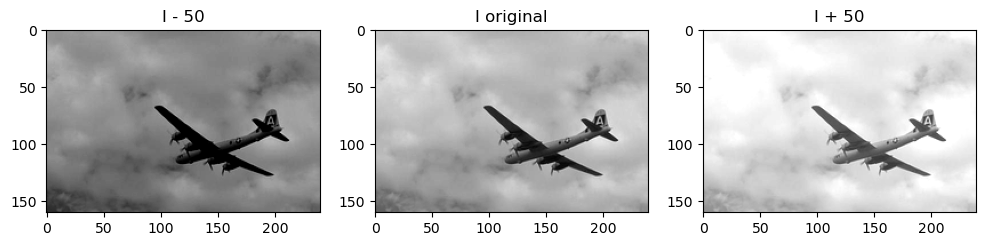

In [47]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(A, cmap='gray', vmin=0, vmax=255)
plt.title('I - 50')
plt.subplot(1,3,2)
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title('I original')
plt.subplot(1,3,3)
plt.imshow(B, cmap='gray', vmin=0, vmax=255)
plt.title('I + 50')
plt.show()

In [48]:
C = np.clip((I.astype(np.float32) / 3), 0, 255).astype(np.uint8)
D = np.clip((I.astype(np.float32) * 3), 0, 255).astype(np.uint8)

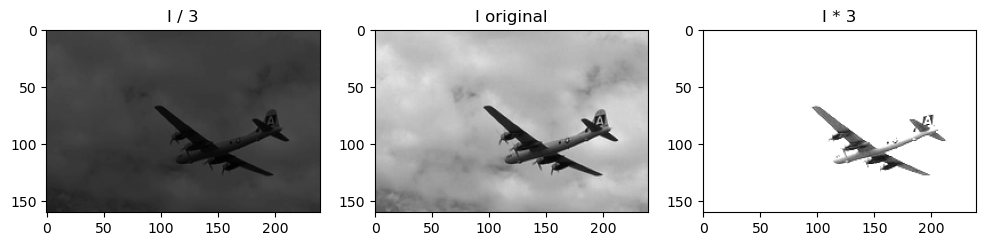

In [49]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(C, cmap='gray', vmin=0, vmax=255)
plt.title('I / 3')
plt.subplot(1,3,2)
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title('I original')
plt.subplot(1,3,3)
plt.imshow(D, cmap='gray', vmin=0, vmax=255)
plt.title('I * 3')
plt.show()

In [50]:
E = np.clip(np.log(1.+(I.astype(np.float32))), 0, 255).astype(np.uint8)
F = np.clip(np.sqrt(I.astype(np.float32)), 0, 255).astype(np.uint8)

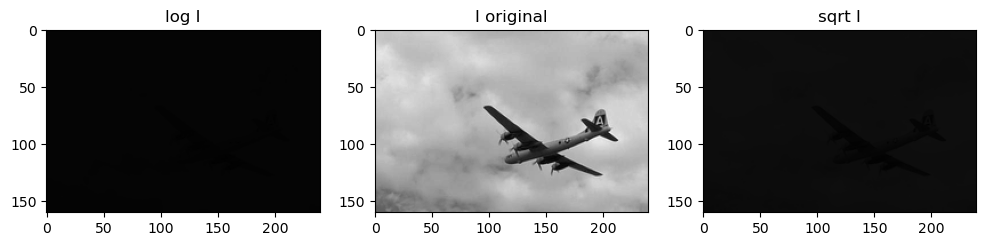

In [51]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(E, cmap='gray', vmin=0, vmax=255)
plt.title('log I')
plt.subplot(1,3,2)
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title('I original')
plt.subplot(1,3,3)
plt.imshow(F, cmap='gray', vmin=0, vmax=255)
plt.title('sqrt I')
plt.show()

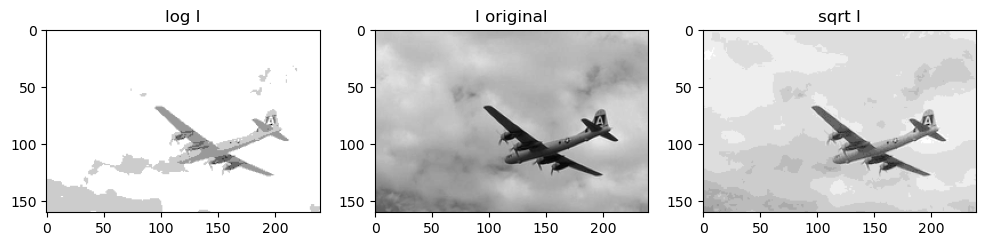

In [52]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(E, cmap='gray')
plt.title('log I')
plt.subplot(1,3,2)
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title('I original')
plt.subplot(1,3,3)
plt.imshow(F, cmap='gray')
plt.title('sqrt I')
plt.show()

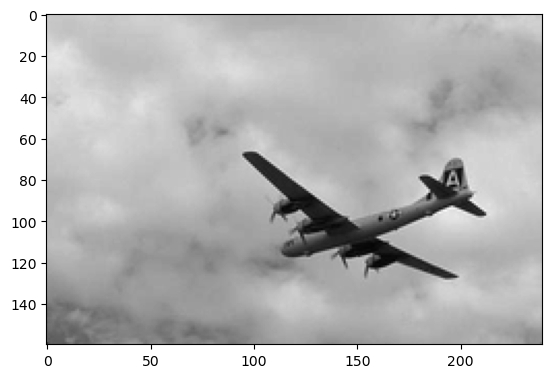

In [53]:
plt.figure()
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.show()

In [54]:
h = np.histogram(I, bins=256)

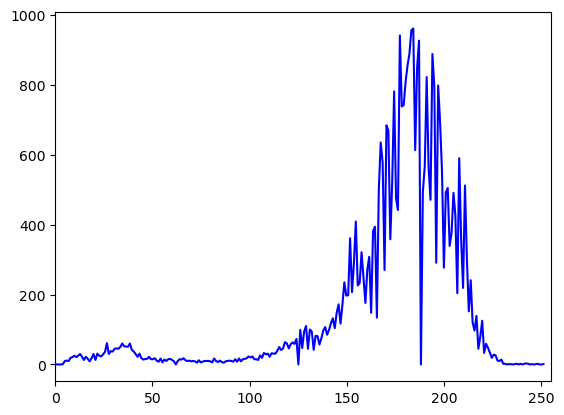

In [55]:
plt.figure()
plt.plot(h[1][:-1], h[0], 'b-')
plt.xlim([0,255])
plt.show()

# Color image

In [56]:
#I = plt.imread('church.jpg')
I = plt.imread('quetzal.png')
I = I[:,:,:3]

In [57]:
I.shape

(550, 500, 3)

In [58]:
print(type(I))
print(type(I[0,0,0]))

<class 'numpy.ndarray'>
<class 'numpy.float32'>


In [59]:
print(I.min(), I.max())

0.0 1.0


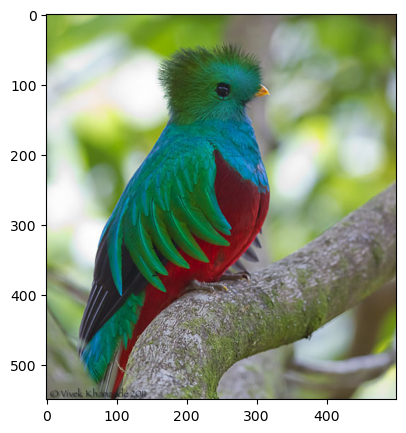

In [60]:
plt.figure(figsize=(5,5))
plt.imshow(I)
plt.show()

In [61]:
Icrop = I[100:120, 300:320]

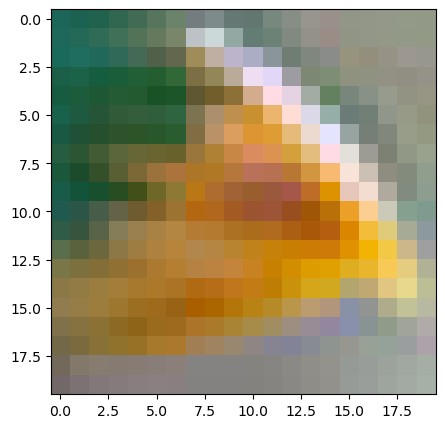

In [62]:
plt.figure(figsize=(5,5))
plt.imshow(Icrop, cmap='gray')
plt.show()

In [63]:
I[100, 300]

array([0.10980392, 0.4       , 0.34901962], dtype=float32)

In [64]:
# Canales cromáticos RGB

R = I[:,:,0]
G = I[:,:,1]
B = I[:,:,2]

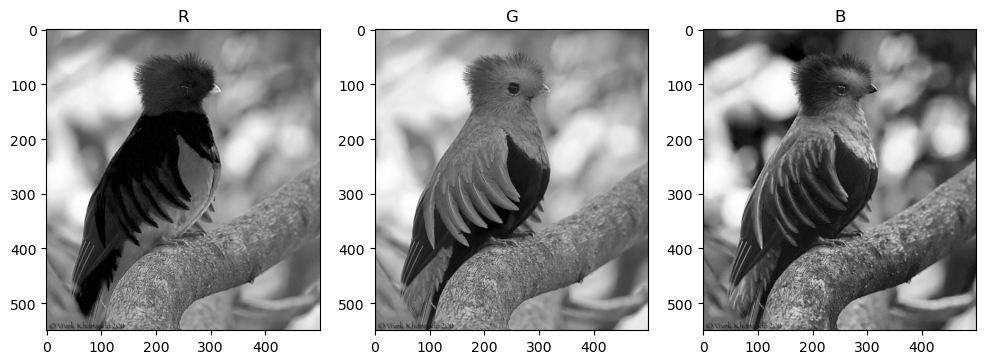

In [65]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(R, cmap='gray', vmin=0, vmax=1)
plt.title('R')
plt.subplot(1,3,2)
plt.imshow(G, cmap='gray', vmin=0, vmax=1)
plt.title('G')
plt.subplot(1,3,3)
plt.imshow(B, cmap='gray', vmin=0, vmax=1)
plt.title('B')
plt.show()

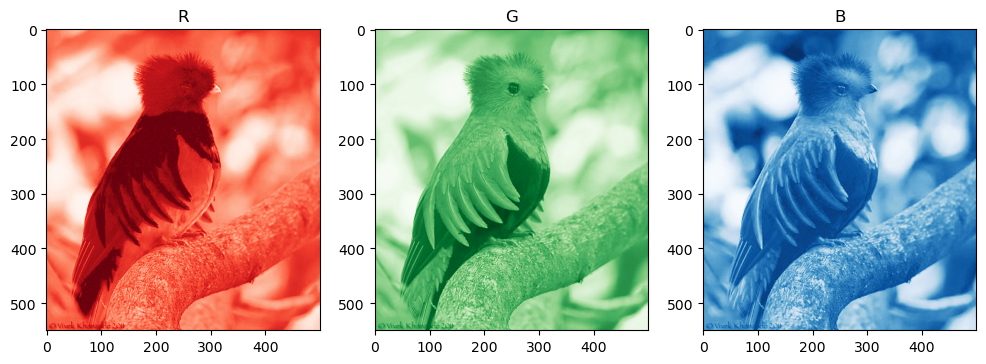

In [66]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(R, cmap=plt.cm.Reds_r, vmin=0, vmax=1)
plt.title('R')
plt.subplot(1,3,2)
plt.imshow(G, cmap=plt.cm.Greens_r, vmin=0, vmax=1)
plt.title('G')
plt.subplot(1,3,3)
plt.imshow(B, cmap=plt.cm.Blues_r, vmin=0, vmax=1)
plt.title('B')
plt.show()

In [67]:
r = np.histogram(R, bins=256)
g = np.histogram(G, bins=256)
b = np.histogram(B, bins=256)

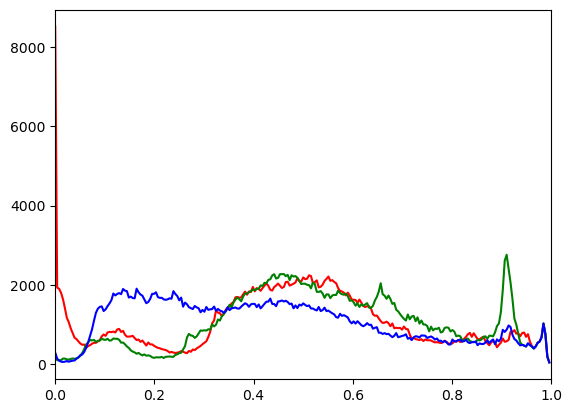

In [68]:
plt.figure()
plt.plot(r[1][:-1], r[0], 'r-')
plt.plot(g[1][:-1], g[0], 'g-')
plt.plot(b[1][:-1], b[0], 'b-')
plt.xlim([0,1])
plt.show()

# 4to Canal ¿Qué es? 

In [69]:
I = plt.imread('plane.png')
I.shape

(160, 240, 4)

In [70]:
I[:10,:10,3]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

In [71]:
J = I.copy()
K = I.copy()
L = I.copy()

In [72]:
J[:,:,3] = 0.25
K[:,:,3] = 0.5
L[:,:,3] = 0.75

In [73]:
print(I.min(), I.max())

0.0 1.0


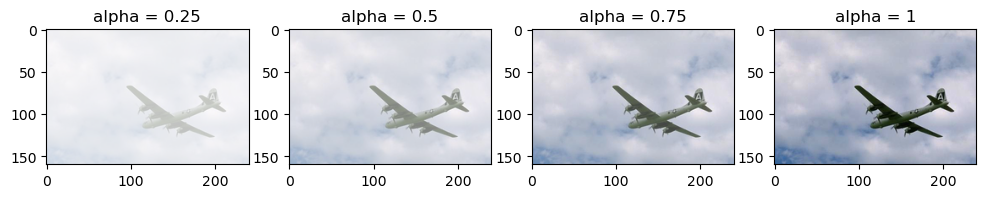

In [74]:
plt.figure(figsize=(12,5))
plt.subplot(1,4,1)
plt.imshow(J, vmin=0, vmax=1)
plt.title('alpha = 0.25')
plt.subplot(1,4,2)
plt.imshow(K, vmin=0, vmax=1)
plt.title('alpha = 0.5')
plt.subplot(1,4,3)
plt.imshow(L, vmin=0, vmax=1)
plt.title('alpha = 0.75')
plt.subplot(1,4,4)
plt.imshow(I, vmin=0, vmax=1)
plt.title('alpha = 1')
plt.show()

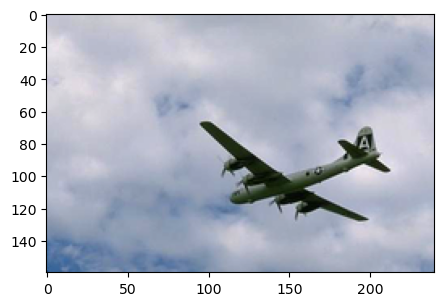

In [75]:
plt.figure(figsize=(5,5))
plt.imshow(I, alpha=1)
plt.show()

In [76]:
mascara = plt.imread('plane_mask.png')

In [77]:
mascara = mascara[:,:,0]

In [78]:
mascara.shape

(160, 240)

In [79]:
Imask = I.copy()

In [80]:
Imask[:,:,3] = mascara

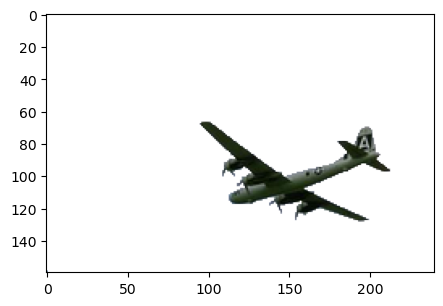

In [81]:
plt.figure(figsize=(5,5))
plt.imshow(Imask)
plt.show()

In [82]:
mascara4 = np.stack([mascara,mascara,mascara,mascara], axis=2)
mascara4.shape

(160, 240, 4)

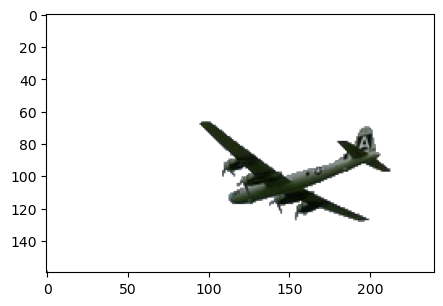

In [83]:
plt.figure(figsize=(5,5))
plt.imshow(I * mascara4)
plt.show()

In [84]:
M = I.copy()
M[:,:150,3] = 0.5
M[:,150:,3] = 0.25

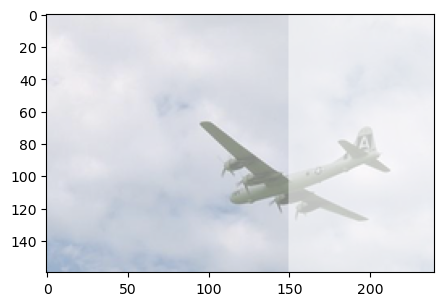

In [85]:
plt.figure(figsize=(5,5))
plt.imshow(M, vmin=0, vmax=1)
plt.show()